Project on COVID19 PREDICTION

Data Exploration and Understanding

Importing Important Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Data Frame loaded with the help of pandas library

In [5]:
df = pd.read_csv(r'/content/corona_tested_006.csv')
data = df.copy()

Now we will understand the dataset we have by implementing different methods.

As we can see we have 11 coloumns in our dataset.

In [6]:
data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14622 entries, 0 to 14621
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Ind_ID               14622 non-null  int64 
 1   Test_date            14622 non-null  object
 2   Cough_symptoms       14622 non-null  object
 3   Fever                14622 non-null  object
 4   Sore_throat          14622 non-null  object
 5   Shortness_of_breath  14622 non-null  object
 6   Headache             14622 non-null  object
 7   Corona               14622 non-null  object
 8   Age_60_above         14621 non-null  object
 9   Sex                  14621 non-null  object
 10  Known_contact        14621 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [8]:
data.shape

(14622, 11)

In [9]:
data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           1
Sex                    1
Known_contact          1
dtype: int64

278848 rows and 11 columns

In [10]:
data.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,14622.000000,14622,14622,14622,14622,14622,14622,14622,14621,14621,14621
unique,NaN,12,3,3,3,3,3,4,3,3,3
top,NaN,19-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,None,Other
freq,NaN,2243,12643,13278,14203,14124,14311,13201,8673,13733,12374
mean,7311.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4221.152153,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3656.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7311.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10966.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data = data.drop('Ind_ID', axis=1)

In [12]:
data['Test_date']

0        11-03-2020
1        11-03-2020
2        11-03-2020
3        11-03-2020
4        11-03-2020
            ...    
14617    22-03-2020
14618    22-03-2020
14619    22-03-2020
14620    22-03-2020
14621    22-03-2020
Name: Test_date, Length: 14622, dtype: object

In [13]:
data["Test_date"] = pd.to_datetime(data["Test_date"])

<ipython-input-13-49db95fc5c18>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data["Test_date"] = pd.to_datetime(data["Test_date"])


In [14]:
data['Cough_symptoms'].unique()

array(['TRUE', 'FALSE', 'None'], dtype=object)

In [15]:
none_count = data['Cough_symptoms'].value_counts()['None']
none_count

11

In [16]:
data = data[data['Cough_symptoms'] != 'None']

In [17]:
# before (278848, 11)
data.shape

(14611, 10)

In [18]:
def to_boolean(value):
    if value == 'TRUE':
        return True
    elif value == 'FALSE':
        return False
    else:
        return value

In [19]:
data['Cough_symptoms'] = data['Cough_symptoms'].apply(to_boolean)

In [20]:
data['Cough_symptoms'].describe

<bound method NDFrame.describe of 0         True
1        False
2        False
3         True
4         True
         ...  
14617    False
14618    False
14619    False
14620    False
14621    False
Name: Cough_symptoms, Length: 14611, dtype: bool>

In [21]:
data.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-11-03,True,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2020-11-03,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,2020-11-03,False,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,2020-11-03,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,2020-11-03,True,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [ ]:
data['Fever'].unique()

array(['FALSE', 'TRUE', 'None', False, True], dtype=object)

In [ ]:
none_count = data['Fever'].value_counts()['None']
none_count

2

In [ ]:
data = data[data['Fever'] != 'None']

In [ ]:
data['Fever'] = data['Fever'].apply(to_boolean)

In [ ]:
data['Fever'].describe

<bound method NDFrame.describe of 0         False
1          True
2          True
3         False
4         False
          ...  
278843    False
278844    False
278845    False
278846    False
278847    False
Name: Fever, Length: 278594, dtype: bool>

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            278594 non-null  datetime64[ns]
 1   Cough_symptoms       278594 non-null  bool          
 2   Fever                278594 non-null  bool          
 3   Sore_throat          278594 non-null  object        
 4   Shortness_of_breath  278594 non-null  object        
 5   Headache             278594 non-null  object        
 6   Corona               278594 non-null  object        
 7   Age_60_above         278594 non-null  object        
 8   Sex                  278594 non-null  object        
 9   Known_contact        278594 non-null  object        
dtypes: bool(2), datetime64[ns](1), object(7)
memory usage: 19.7+ MB


In [ ]:
data['Sore_throat'].unique()

array(['TRUE', 'FALSE', False, True], dtype=object)

In [ ]:
data['Sore_throat'] = data['Sore_throat'].apply(to_boolean)

In [ ]:
data['Sore_throat'].unique()

array([ True, False])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            278594 non-null  datetime64[ns]
 1   Cough_symptoms       278594 non-null  bool          
 2   Fever                278594 non-null  bool          
 3   Sore_throat          278594 non-null  bool          
 4   Shortness_of_breath  278594 non-null  object        
 5   Headache             278594 non-null  object        
 6   Corona               278594 non-null  object        
 7   Age_60_above         278594 non-null  object        
 8   Sex                  278594 non-null  object        
 9   Known_contact        278594 non-null  object        
dtypes: bool(3), datetime64[ns](1), object(6)
memory usage: 17.8+ MB


In [ ]:
data['Shortness_of_breath'].unique()

array(['FALSE', 'TRUE', False, True], dtype=object)

In [ ]:
data['Shortness_of_breath'] = data['Shortness_of_breath'].apply(to_boolean)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            278594 non-null  datetime64[ns]
 1   Cough_symptoms       278594 non-null  bool          
 2   Fever                278594 non-null  bool          
 3   Sore_throat          278594 non-null  bool          
 4   Shortness_of_breath  278594 non-null  bool          
 5   Headache             278594 non-null  object        
 6   Corona               278594 non-null  object        
 7   Age_60_above         278594 non-null  object        
 8   Sex                  278594 non-null  object        
 9   Known_contact        278594 non-null  object        
dtypes: bool(4), datetime64[ns](1), object(5)
memory usage: 15.9+ MB


In [ ]:
data['Headache'].unique()

array(['FALSE', 'TRUE', False, True], dtype=object)

In [ ]:
data['Headache'] = data['Headache'].apply(to_boolean)

In [ ]:
data['Headache'].unique()

array([False,  True])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            278594 non-null  datetime64[ns]
 1   Cough_symptoms       278594 non-null  bool          
 2   Fever                278594 non-null  bool          
 3   Sore_throat          278594 non-null  bool          
 4   Shortness_of_breath  278594 non-null  bool          
 5   Headache             278594 non-null  bool          
 6   Corona               278594 non-null  object        
 7   Age_60_above         278594 non-null  object        
 8   Sex                  278594 non-null  object        
 9   Known_contact        278594 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 14.1+ MB


In [ ]:
data['Corona'].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [ ]:
none_count = data['Corona'].value_counts()['other']
none_count

3892

In [ ]:
data = data[data['Corona'] != 'other']

In [ ]:
data['Age_60_above'].unique()

array(['None', 'No', 'Yes'], dtype=object)

In [ ]:
none_count = data['Age_60_above'].value_counts()['None']
none_count

125659

In [ ]:
data = data.drop('Age_60_above', axis=1)

In [ ]:
data.shape

(274702, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  bool          
 2   Fever                274702 non-null  bool          
 3   Sore_throat          274702 non-null  bool          
 4   Shortness_of_breath  274702 non-null  bool          
 5   Headache             274702 non-null  bool          
 6   Corona               274702 non-null  object        
 7   Sex                  274702 non-null  object        
 8   Known_contact        274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(3)
memory usage: 11.8+ MB


In [ ]:
data['Sex'].unique()

array(['None', 'male', 'female'], dtype=object)

In [ ]:
none_count = data['Sex'].value_counts()['None']
none_count

19034

In [ ]:
# replace "None" with the mode
mode = data['Sex'].mode()[0]
data['Sex'] = data['Sex'].replace("None", mode)

In [ ]:
data['Sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  bool          
 2   Fever                274702 non-null  bool          
 3   Sore_throat          274702 non-null  bool          
 4   Shortness_of_breath  274702 non-null  bool          
 5   Headache             274702 non-null  bool          
 6   Corona               274702 non-null  object        
 7   Sex                  274702 non-null  object        
 8   Known_contact        274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(3)
memory usage: 11.8+ MB


In [ ]:
data['Known_contact'].unique()

array(['Abroad', 'Contact with confirmed', 'Other'], dtype=object)

In [ ]:
val_count = data['Known_contact'].value_counts()['Other']
val_count

239167

In [ ]:
val_count = data['Known_contact'].value_counts()['Abroad']
val_count

25068

In [ ]:
val_count = data['Known_contact'].value_counts()['Contact with confirmed']
val_count

10467

In [ ]:
data = data.drop('Known_contact', axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  bool          
 2   Fever                274702 non-null  bool          
 3   Sore_throat          274702 non-null  bool          
 4   Shortness_of_breath  274702 non-null  bool          
 5   Headache             274702 non-null  bool          
 6   Corona               274702 non-null  object        
 7   Sex                  274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(2)
memory usage: 9.7+ MB


In [ ]:
data.info

<bound method DataFrame.info of         Test_date  Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  \
0      2020-11-03            True  False         True                False   
1      2020-11-03           False   True        False                False   
2      2020-11-03           False   True        False                False   
3      2020-11-03            True  False        False                False   
4      2020-11-03            True  False        False                False   
...           ...             ...    ...          ...                  ...   
278843 2020-04-30           False  False        False                False   
278844 2020-04-30           False  False        False                False   
278845 2020-04-30           False  False        False                False   
278846 2020-04-30           False  False        False                False   
278847 2020-04-30           False  False        False                False   

        Headache    Corona     

In [ ]:
data.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
dtype: int64

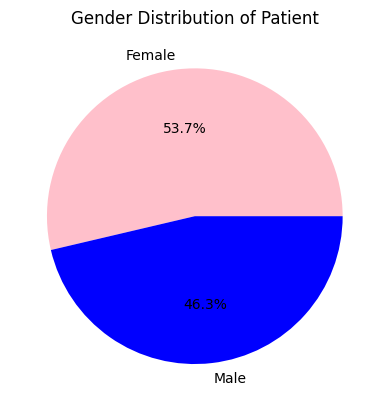

In [ ]:
plt.pie(data['Sex'].value_counts(),
labels=['Female', 'Male'], colors=['pink', 'blue'], autopct='%1.1f%%')
plt.title('Gender Distribution of Patient')
plt.show()

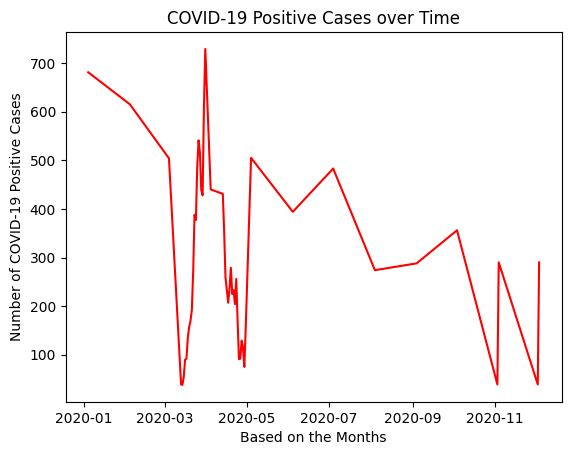

In [ ]:
date_counts = data[data['Corona']=='positive'].groupby('Test_date').size().reset_index(name='counts')
plt.plot(date_counts['Test_date'], date_counts['counts'], color='red')
plt.xlabel('Based on the Months')
plt.ylabel('Number of COVID-19 Positive Cases')
plt.title('COVID-19 Positive Cases over Time')
plt.show()

In [ ]:
#print(date_counts)
data.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,2020-11-03,True,False,True,False,False,negative,female
1,2020-11-03,False,True,False,False,False,positive,female
2,2020-11-03,False,True,False,False,False,positive,female
3,2020-11-03,True,False,False,False,False,negative,female
4,2020-11-03,True,False,False,False,False,negative,female


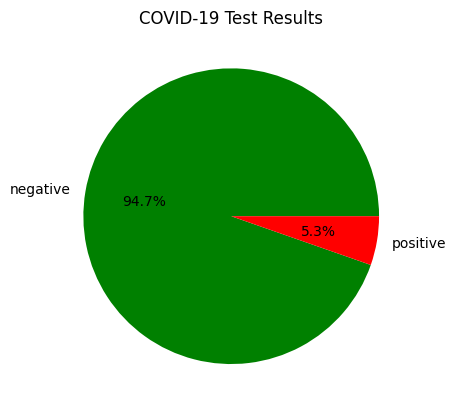

In [ ]:
corona_counts = data['Corona'].value_counts()
plt.pie(corona_counts, labels=corona_counts.index, autopct='%1.1f%%', colors=['green', 'red'])
plt.title('COVID-19 Test Results')
plt.show()

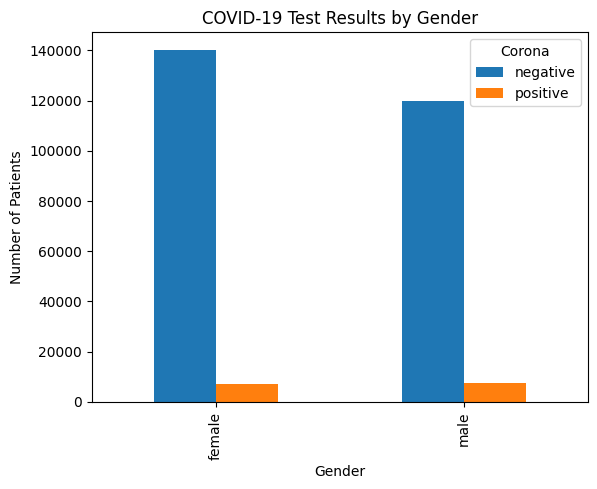

In [ ]:
gender_corona_counts = data.groupby(['Sex', 'Corona']).size().unstack(fill_value=0)
gender_corona_counts.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.title('COVID-19 Test Results by Gender')
plt.show()

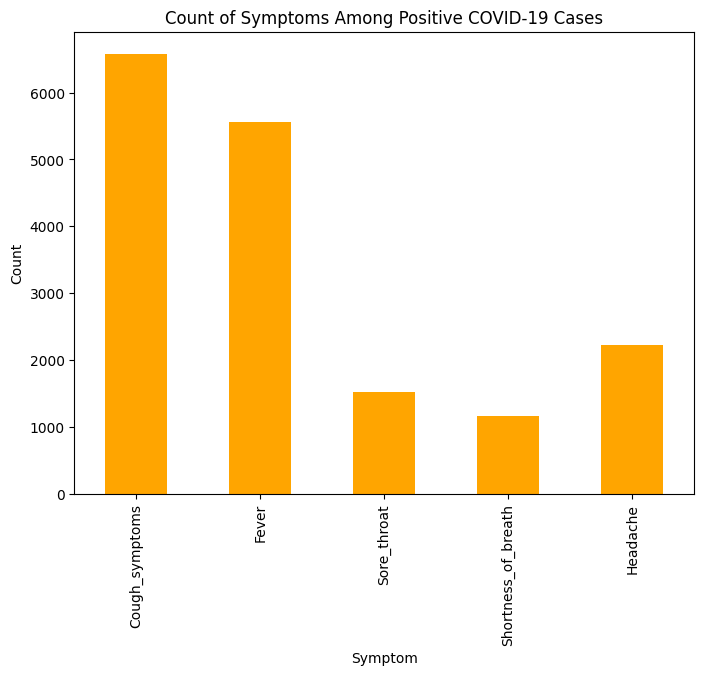

In [ ]:
# Select only the rows where at least one symptom is present
symptom_rows = data[data[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].any(axis=1)]

# Select only the positive cases among these rows
positive_symptom_rows = symptom_rows[symptom_rows['Corona'] == 'positive']

# Calculate the count of each symptom among positive cases
symptom_counts = positive_symptom_rows[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']].sum()

# Plot the results
fig, ax = plt.subplots(figsize=(8,6))
symptom_counts.plot(kind='bar', color='orange', ax=ax)
ax.set_xlabel('Symptom')
ax.set_ylabel('Count')
ax.set_title('Count of Symptoms Among Positive COVID-19 Cases')
plt.show()

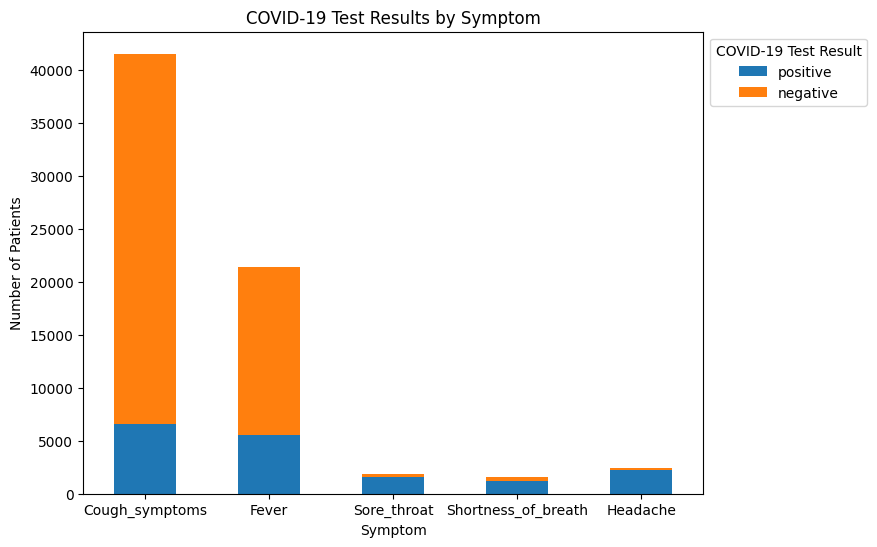

In [ ]:
symptom_counts = data.iloc[:,1:6].sum()
symptom_corona_counts = data.groupby(['Corona'])[symptom_counts.index].sum().T
symptom_corona_counts['Total'] = symptom_corona_counts.sum(axis=1)
symptom_corona_counts['Positive Proportion'] = symptom_corona_counts['positive'] / symptom_corona_counts['Total']

fig, ax = plt.subplots(figsize=(8,6))
symptom_corona_counts[['positive', 'negative']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Symptom')
ax.set_ylabel('Number of Patients')
ax.set_title('COVID-19 Test Results by Symptom')
plt.xticks(rotation=0)
plt.legend(title='COVID-19 Test Result', loc='upper left', bbox_to_anchor=(1.0, 1))
plt.show()

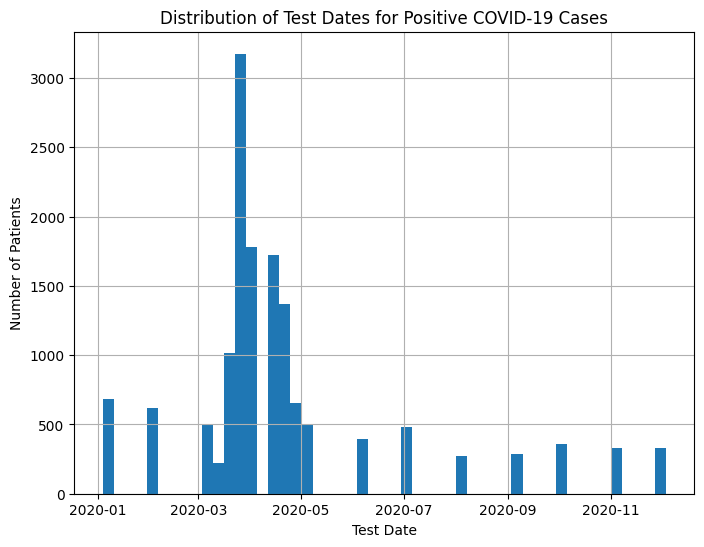

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='positive']['Test_date'].hist(ax=ax, bins=51)
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for Positive COVID-19 Cases')
plt.show()

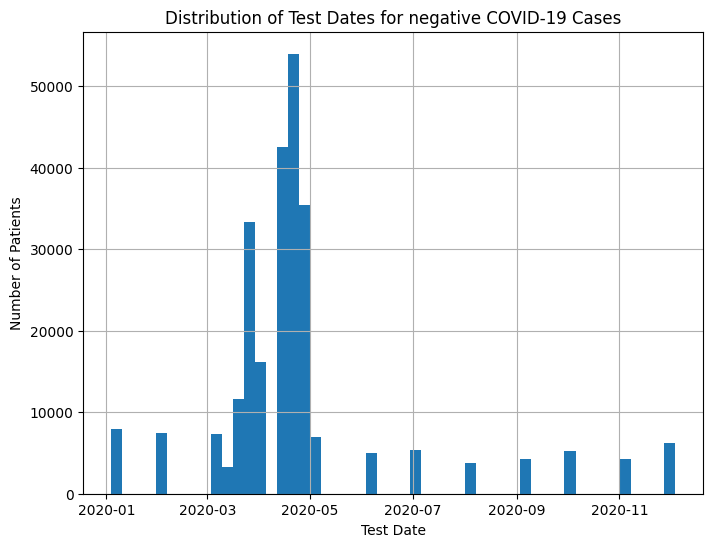

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='negative']['Test_date'].hist(ax=ax, bins=51)
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for negative COVID-19 Cases')
plt.show()

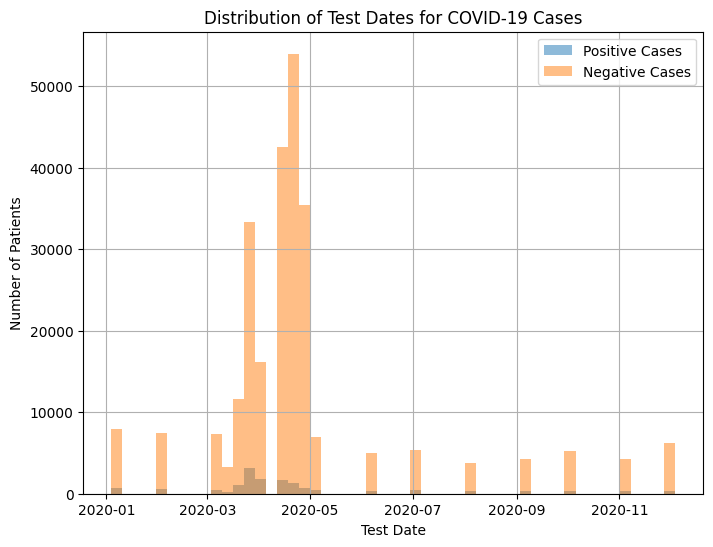

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
data[data['Corona']=='positive']['Test_date'].hist(ax=ax, bins=51, alpha=0.5, label='Positive Cases')
data[data['Corona']=='negative']['Test_date'].hist(ax=ax, bins=51, alpha=0.5, label='Negative Cases')
ax.set_xlabel('Test Date')
ax.set_ylabel('Number of Patients')
ax.set_title('Distribution of Test Dates for COVID-19 Cases')
ax.legend()
plt.show()

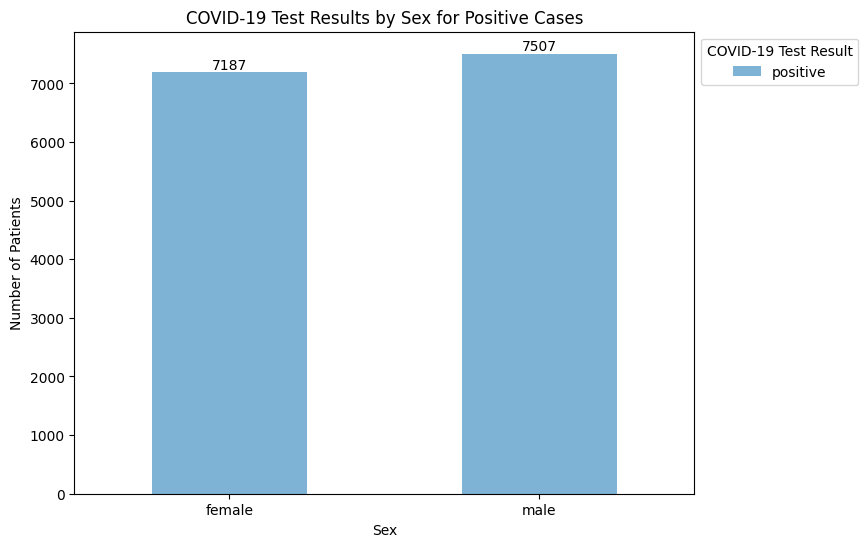

In [ ]:
sex_counts = data[data['Corona']=='positive'].groupby(['Sex', 'Corona']).size().unstack(fill_value=0)
sex_counts['Total'] = sex_counts.sum(axis=1)

fig, ax = plt.subplots(figsize=(8,6))
sex_counts[['positive']].plot(kind='bar', stacked=True, ax=ax, color=['#7fb3d5', '#f7a35c'])
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Patients')
ax.set_title('COVID-19 Test Results by Sex for Positive Cases')
plt.xticks(rotation=0)
plt.legend(title='COVID-19 Test Result', loc='upper left', bbox_to_anchor=(1.0, 1))

# add annotations
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)

plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Encode boolean variables as 0 or 1
bool_cols = ["Cough_symptoms", "Fever", "Sore_throat", "Shortness_of_breath", "Headache"]
data[bool_cols] = data[bool_cols].astype(int)

le = LabelEncoder()
# Encode categorical variables using LabelEncoder
data["Corona"] = le.fit_transform(data["Corona"])

# Check the data types of each column
print(data.dtypes)

Test_date              datetime64[ns]
Cough_symptoms                  int64
Fever                           int64
Sore_throat                     int64
Shortness_of_breath             int64
Headache                        int64
Corona                          int64
Sex                            object
dtype: object


In [ ]:
data.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex
0,2020-11-03,1,0,1,0,0,0,female
1,2020-11-03,0,1,0,0,0,1,female
2,2020-11-03,0,1,0,0,0,1,female
3,2020-11-03,1,0,0,0,0,0,female
4,2020-11-03,1,0,0,0,0,0,female


In [ ]:
data.dtypes

Test_date              datetime64[ns]
Cough_symptoms                  int64
Fever                           int64
Sore_throat                     int64
Shortness_of_breath             int64
Headache                        int64
Corona                          int64
Sex                            object
dtype: object

In [ ]:
x = data[['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']]
y = data['Corona']

In [ ]:
# splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache
252646,0,0,0,0,0
205866,0,0,0,0,0
167130,0,0,0,0,0
169030,0,0,0,0,0
192383,0,0,0,0,0
...,...,...,...,...,...
121685,0,0,0,0,0
263209,0,0,0,0,0
133859,0,0,0,0,0
149430,0,0,0,0,0


In [ ]:
y_train

252646    0
205866    0
167130    0
169030    0
192383    0
         ..
121685    0
263209    0
133859    0
149430    0
123766    0
Name: Corona, Length: 219761, dtype: int64

In [ ]:
print(x_test)
print(y_test)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache
173216               0      0            0                    0         0
28766                0      0            0                    0         0
243037               0      0            0                    0         0
55871                0      0            0                    0         0
216385               0      0            0                    0         0
...                ...    ...          ...                  ...       ...
21804                0      0            0                    0         0
61199                0      0            0                    0         0
148492               1      0            0                    0         0
63813                0      1            0                    0         0
205815               0      0            0                    0         0

[54941 rows x 5 columns]
173216    0
28766     0
243037    0
55871     0
216385    0
         ..
21804     0
61

In [ ]:
# importing cost function libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Split the data into training/validation and test sets
train_val_data = data[data['Test_date'] <= '2020-04-15']
test_data = data[data['Test_date'] >= '2020-04-16']

X_train_val = train_val_data.drop('Corona', axis=1)
y_train_val = train_val_data['Corona']
X_test = test_data.drop('Corona', axis=1)
y_test = test_data['Corona']

# Further split the training/validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=42)

# Create a ColumnTransformer to encode categorical features
categorical_features = ['Sex']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)])

In [ ]:
# Define the machine learning models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', model)])
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_val)
    print(f"{name} Validation Accuracy: {accuracy_score(y_val, y_pred)}")

# Test the best model on the test set
best_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', RandomForestClassifier(random_state=42))])
best_model.fit(X_train_val, y_train_val)
y_pred = best_model.predict(X_test)
print(f"Best Model Test Accuracy: {accuracy_score(y_test, y_pred)}")

Logistic Regression Validation Accuracy: 0.9214037496246085
Decision Tree Validation Accuracy: 0.9214037496246085
Random Forest Validation Accuracy: 0.9214037496246085
Support Vector Machine Validation Accuracy: 0.9214037496246085
Best Model Test Accuracy: 0.9642385194645894


SQL Questions

1) Find the number of corona patients who faced shortness of breath.

In [1]:
import duckdb

In [22]:
conn = duckdb.connect()
conn.register("df",df)


In [23]:
d = conn.execute("select * from df")

In [24]:
d.fetchdf()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
14617,14618,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
14618,14619,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
14619,14620,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other
14620,14621,22-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,negative,No,female,Other


In [25]:
conn.execute("SELECT COUNT(*) FROM data WHERE Corona = 'positive' AND Shortness_of_breath = 'True'").fetchdf()

,count_star()
0,0


-- 2. Find the number of negative corona patients who have fever and sore_throat.


In [27]:
conn.execute("select count(*) from df where corona = 'negative' and fever = 'True' and sore_throat = 'True'").fetchdf()

,count_star()
0,0
